In [ ]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Read data
df = pd.read_csv('flood.csv')
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# Data Understanding

In [ ]:
# Columns
print('Columns : ', df.columns)
print('There are : ', len(df.columns), 'columns')

Columns :  Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')
There are :  21 columns


IMPORTANT FEATURES OF DATASET: <br>
The dataset used for this analysis comprises numerous features, providing essential insights into environmental and human factors that influence flood occurrence and severity. These features include:

1. MonsoonIntensity: Higher volumes of rain during monsoons increase the probability of floods.
2. TopographyDrainage: The drainage capacity based on the region's topography. Efficient drainage can help drain rainwater and reduce the risk of floods.
3. RiverManagement: The quality and effectiveness of river management practices. Proper river management, including dredging and bank maintenance, can improve water flow and reduce floods.
4. Deforestation: The extent of deforestation in the area.* Deforestation reduces the soil's ability to absorb water, increasing surface runoff and the risk of floods.
5. Urbanization: The level of urbanization in the region. Urban areas have impermeable surfaces (asphalt, concrete), which reduce water infiltration, raising the risk of floods.
6. ClimateChange: The impact of climate change on the region. Climate change can lead to more extreme precipitation patterns, including torrential rains that can cause floods.
7. DamsQuality: The quality and maintenance status of dams. Well-maintained dams can control floods, and dams with structural problems can break and cause catastrophic floods.
8. Siltation:  The extent of siltation in rivers and reservoirs. The accumulation of sediments in rivers (siltation) reduces drainage capacity and increases the risk of floods.
9. Agricultural Practices: The types and sustainability of agricultural practices. The intensification of agriculture can lead to deforestation, excessive use of fertilizers and pesticides, and inappropriate irrigation practices, reducing soil biodiversity and increasing the risk of floods.
10. Encroachments:The degree of encroachment on flood plains and natural waterways. Construction in flood-prone areas impedes the natural flow of water and increases the risk of floods.
11. IneffectiveDisasterPreparedness:  The lack of emergency plans, warning systems, and simulations increases the negative impact of floods.
12. DrainageSystems: Well-maintained and adequately sized drainage systems help drain rainwater and reduce the risk of floods.
13. CoastalVulnerability: Low-lying coastal areas are prone to flooding from storm surges and sea level rise.
14. Landslides: Steep slopes and unstable soils are more prone to landslides.
15. Watersheds: Regions with more watersheds may have a higher or lower risk of flooding, depending on various factors.
16. DeterioratingInfrastructure: Clogged culverts, damaged drainage channels, and other deficient infrastructure can increase the risk of floods.
17. PopulationScore: Densely populated areas can suffer more severe losses.
18. WetlandLoss: Wetlands act as natural sponges, absorbing excess water and helping to prevent floods.
19. InadequatePlanning: Urban planning that does not consider the risk of flooding increases the vulnerability of communities.
20. PoliticalFactors: Factors such as corruption and a lack of political will to invest in drainage infrastructure can make it difficult to manage flood risk.
21. FloodProbability: The overall probability of flooding in the region. This is the target variable for predictive analysis. This is the target Variable.

In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

all features are already in the data type they should be, nothing needs to be changed

In [ ]:
# Shape
print("Shape : ", df.shape)

Shape :  (50000, 21)


In [ ]:
# Duplicated data checking
print('Duplicated Data : ', df.duplicated().sum())

Duplicated Data :  0


There is no duplicated data in this dataset

In [ ]:
# Missing Value Checking
print('Total Missing Value : ', df.isnull().sum())

Total Missing Value :  MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


There is no Missing Value in this dataset

In [ ]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,50000.0,4.99148,2.236834,0.000,3.000,5.0,6.000,16.000
TopographyDrainage,50000.0,4.98410,2.246488,0.000,3.000,5.0,6.000,18.000
RiverManagement,50000.0,5.01594,2.231310,0.000,3.000,5.0,6.000,16.000
Deforestation,50000.0,5.00848,2.222743,0.000,3.000,5.0,6.000,17.000
Urbanization,50000.0,4.98906,2.243159,0.000,3.000,5.0,6.000,17.000
ClimateChange,50000.0,4.98834,2.226761,0.000,3.000,5.0,6.000,17.000
DamsQuality,50000.0,5.01536,2.245000,0.000,3.000,5.0,6.000,16.000
Siltation,50000.0,4.98860,2.232642,0.000,3.000,5.0,6.000,16.000
AgriculturalPractices,50000.0,5.00612,2.234588,0.000,3.000,5.0,6.000,16.000
Encroachments,50000.0,5.00638,2.241633,0.000,3.000,5.0,6.000,18.000


All features have a simillar variance

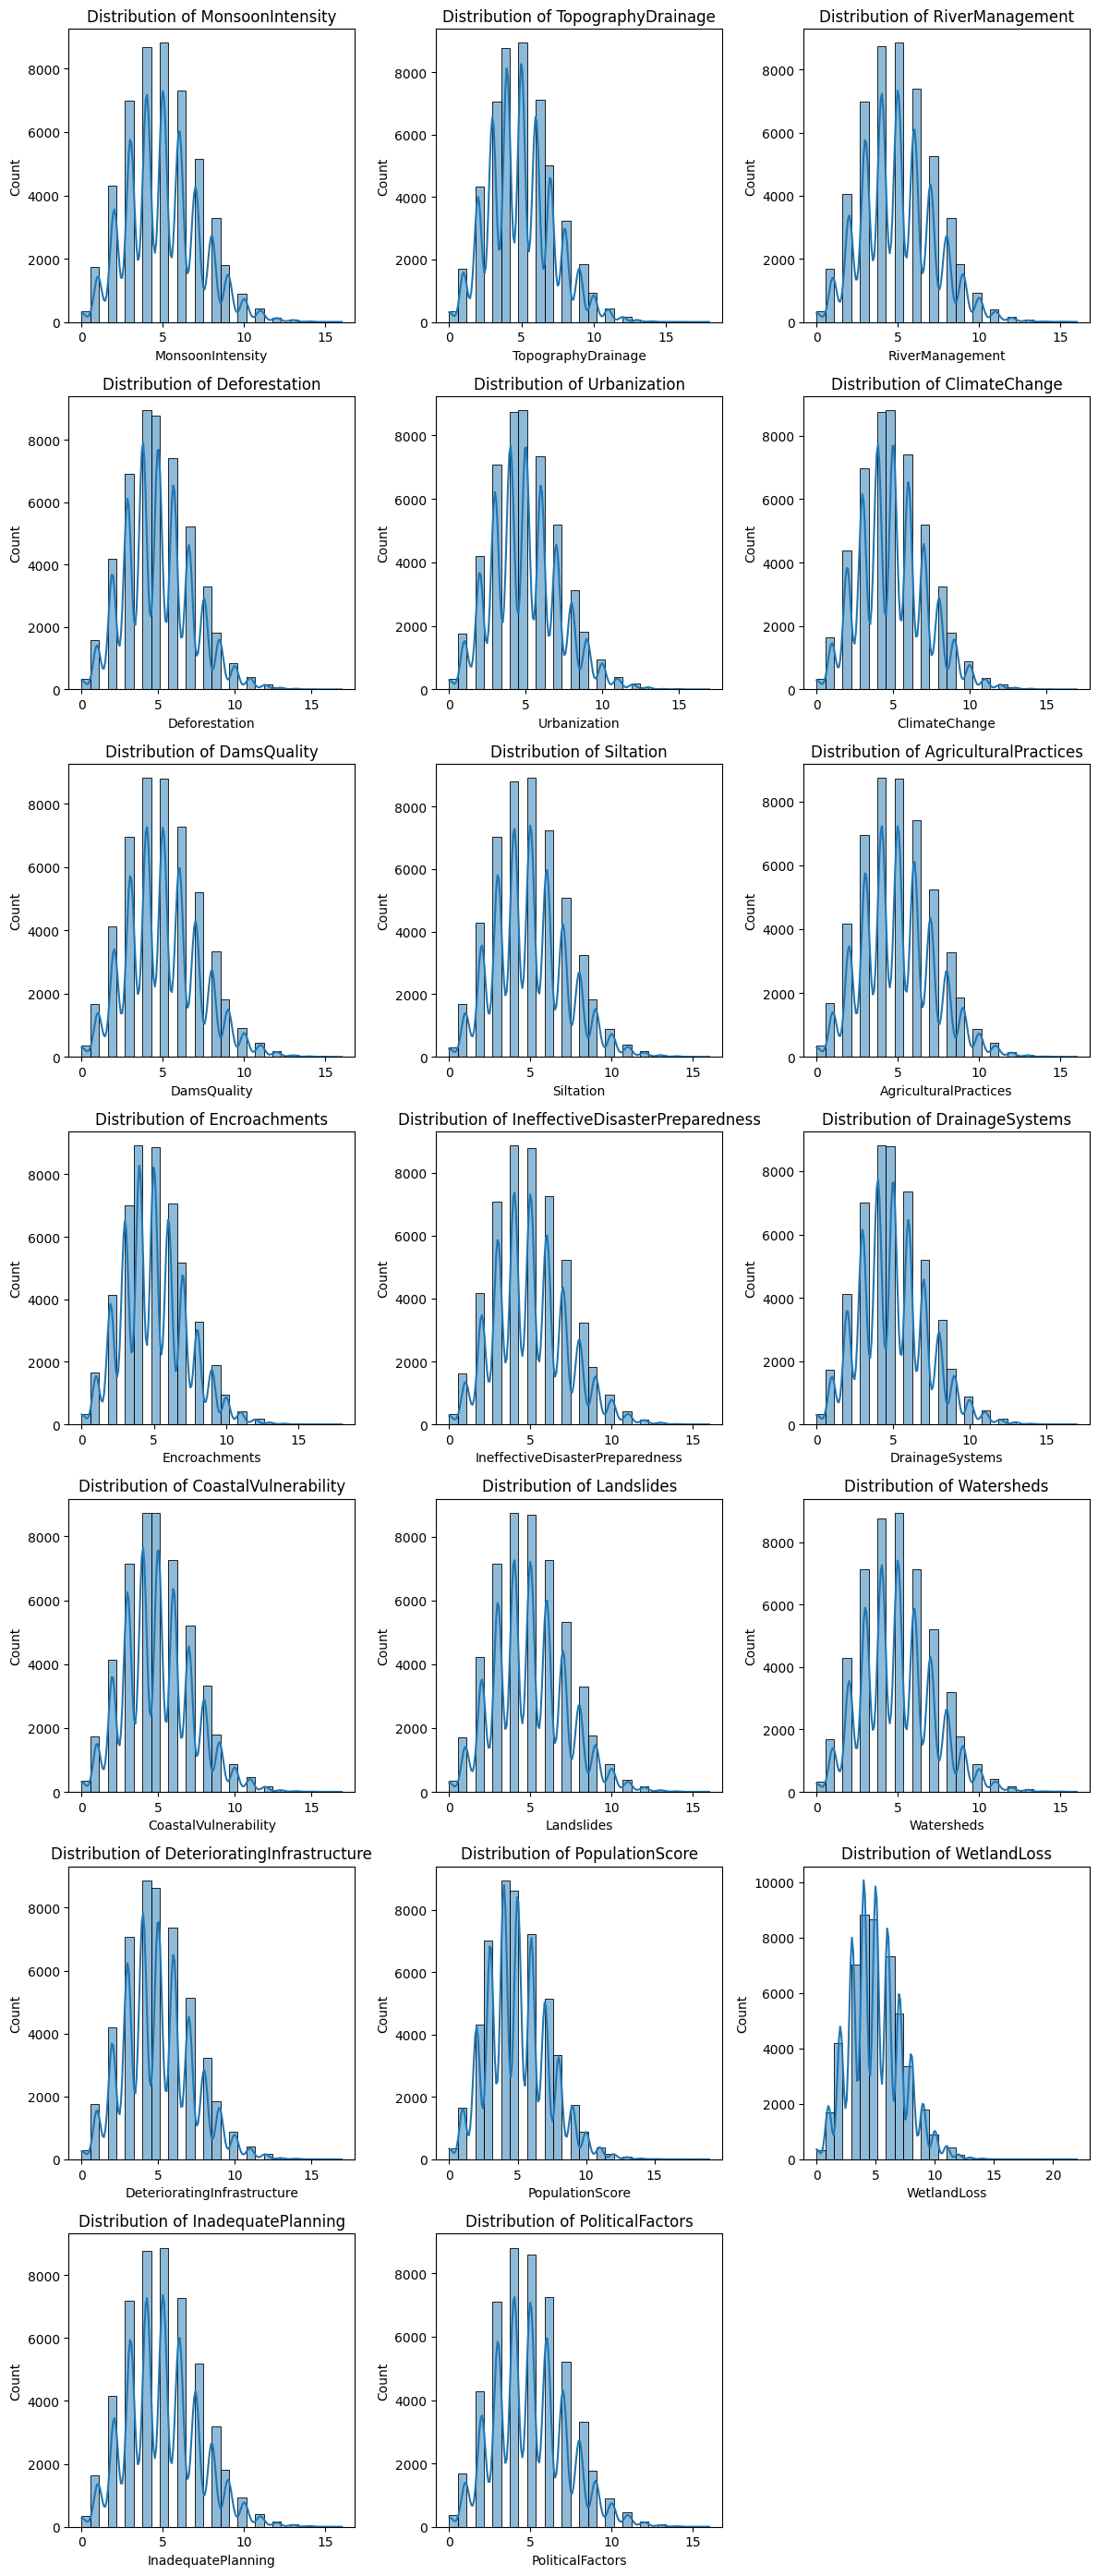

In [ ]:
# Show Distribution for all features
n_cols = 3
n_plots = len(df.columns[:-1])
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Almost all features have a Right Skewed

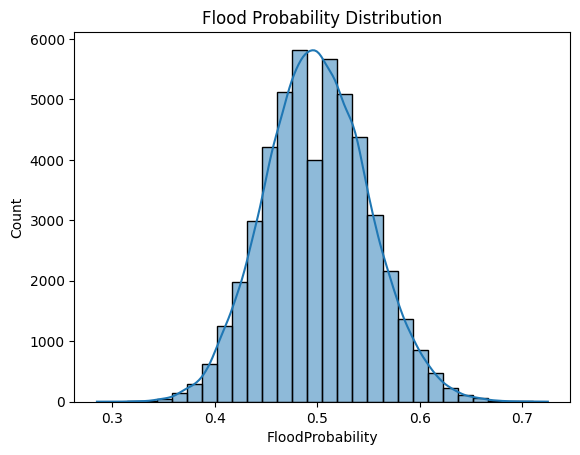

In [ ]:
  # Show FloodProbability Distribution
  sns.histplot(df['FloodProbability'], kde=True, bins=30)
  plt.title('Flood Probability Distribution')
  plt.show()

FloodProbability Feature have a normal distribution

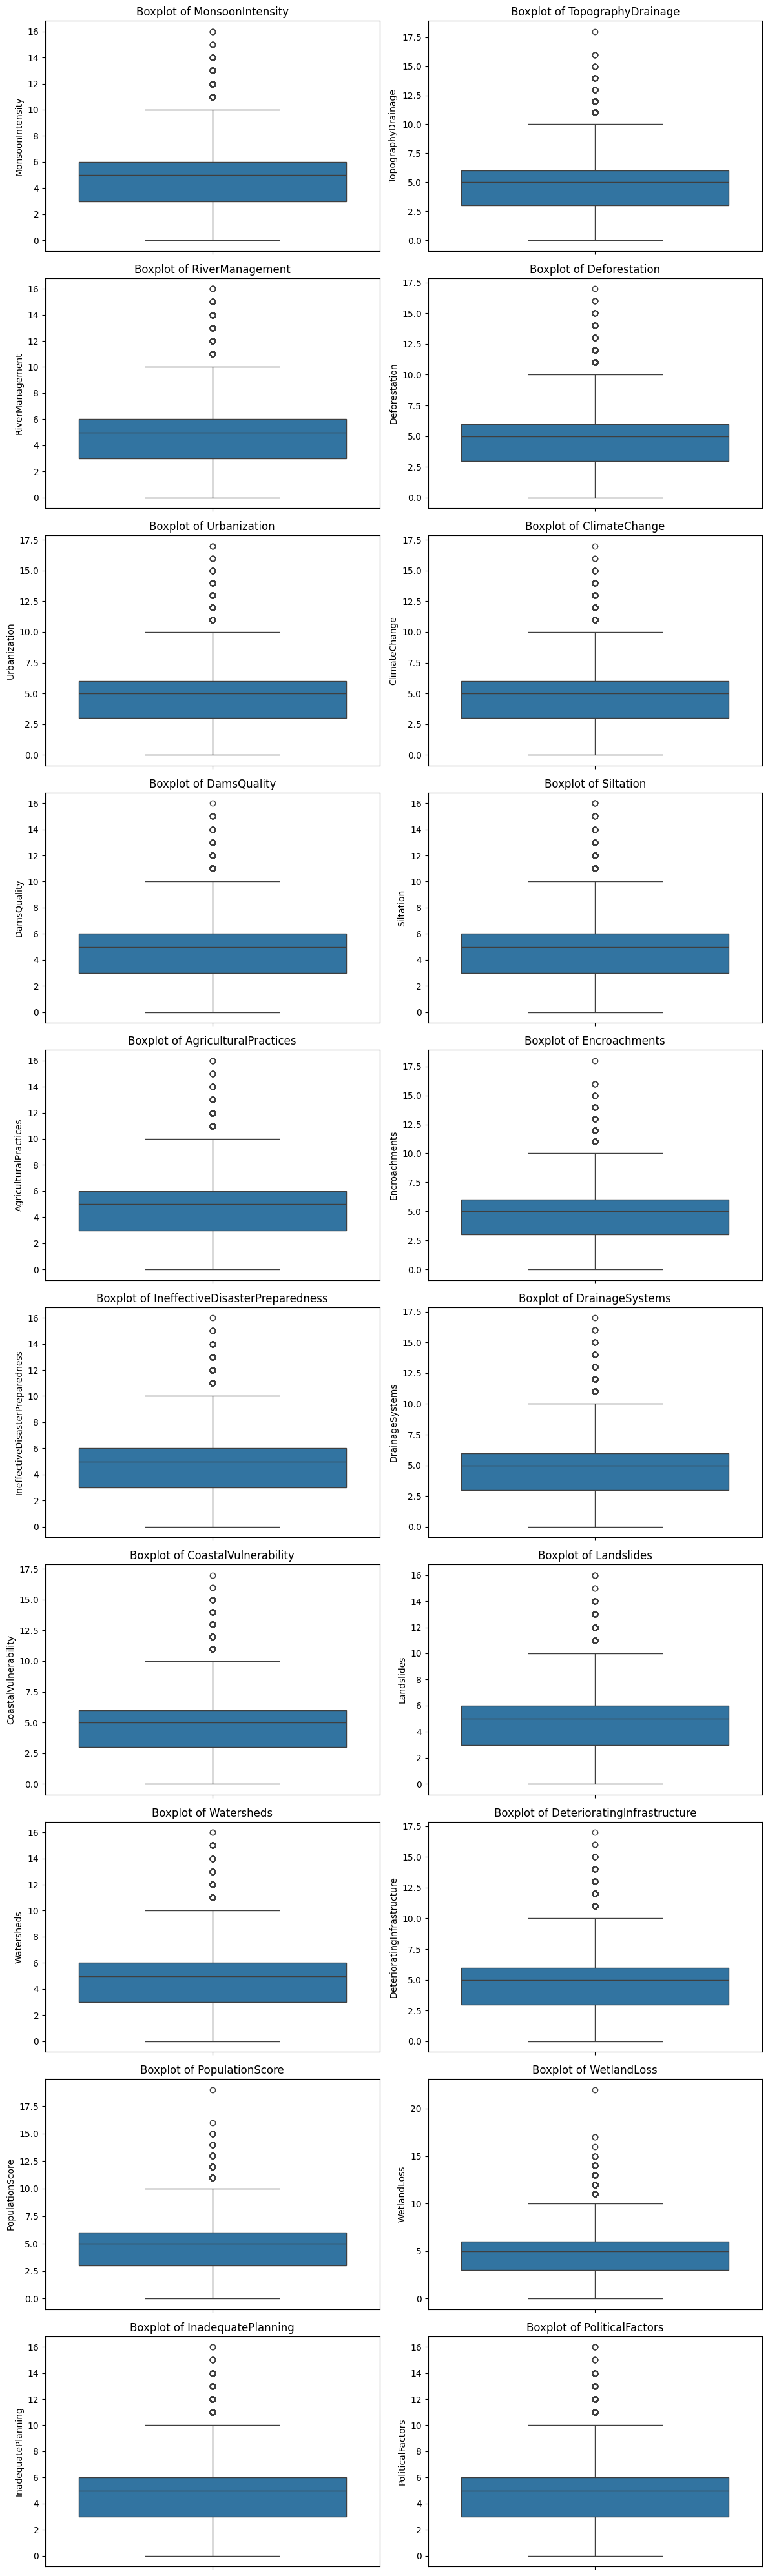

In [ ]:
# Show Boxplot for all features
n_cols = 2
n_plots = len(df.columns[:-1])
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

All Features have an Outliers

Text(0.5, 1.0, 'Boxplot of FloodProbability')

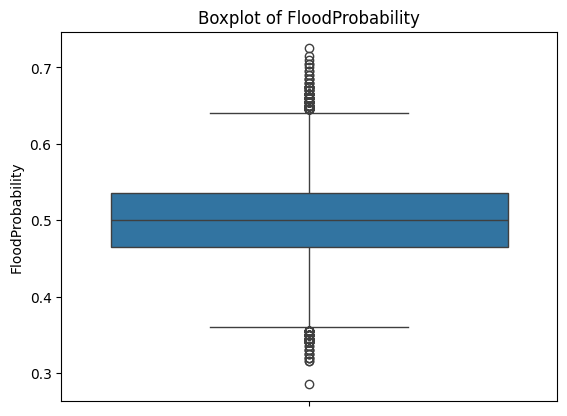

In [ ]:
# Show FloodProbability Boxplot
sns.boxplot(y=df['FloodProbability'])
plt.title('Boxplot of FloodProbability')

There are many outliers in the FloodProbability Feature

In [ ]:
# Show Total Outliers
outlier_summary = {}

for col in df.columns:
    if df[col].dtype != 'object':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Variable', 'Outlier_Count'])
outlier_df.sort_values(by='Outlier_Count', ascending=False)

,Variable,Outlier_Count
12,CoastalVulnerability,747
6,DamsQuality,741
11,DrainageSystems,731
19,PoliticalFactors,722
1,TopographyDrainage,711
9,Encroachments,688
4,Urbanization,687
0,MonsoonIntensity,686
14,Watersheds,686
8,AgriculturalPractices,683


In [ ]:
# Show outliers value in all features
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col} - Outlier count: {len(outliers)}")
    print(outliers[col].value_counts().head())
    print("-" * 40)

MonsoonIntensity - Outlier count: 686
MonsoonIntensity
11    436
12    148
13     74
14     21
15      4
Name: count, dtype: int64
----------------------------------------
TopographyDrainage - Outlier count: 711
TopographyDrainage
11    439
12    171
13     69
14     22
15      5
Name: count, dtype: int64
----------------------------------------
RiverManagement - Outlier count: 661
RiverManagement
11    401
12    164
13     61
14     19
15     12
Name: count, dtype: int64
----------------------------------------
Deforestation - Outlier count: 682
Deforestation
11    411
12    166
13     63
14     28
15      9
Name: count, dtype: int64
----------------------------------------
Urbanization - Outlier count: 687
Urbanization
11    390
12    178
13     78
14     19
15     15
Name: count, dtype: int64
----------------------------------------
ClimateChange - Outlier count: 647
ClimateChange
11    375
12    172
13     62
14     26
15      9
Name: count, dtype: int64
---------------------------

FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
Name: FloodProbability, dtype: float64


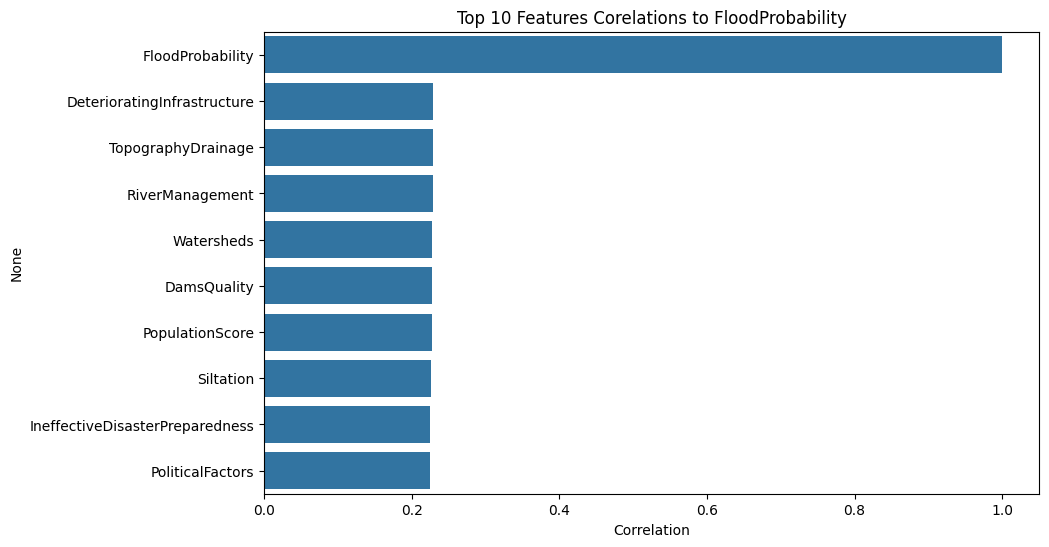

In [ ]:
# Feature Importance to FloodProbability
correlation = df.corr(numeric_only=True)
flood_corr = correlation["FloodProbability"].sort_values(ascending=False)
print(flood_corr.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=flood_corr.head(10).values, y=flood_corr.head(10).index)
plt.title("Top 10 Features Corelations to FloodProbability")
plt.xlabel("Correlation")
plt.show()

all features have almost the same correlation, which is around 0.2

In [ ]:
# Correlation Check
correlation = df.corr()['FloodProbability'].sort_values(ascending=False)
print(correlation.sort_values())

CoastalVulnerability               0.215187
DrainageSystems                    0.217895
Encroachments                      0.218259
Deforestation                      0.220237
Urbanization                       0.220867
ClimateChange                      0.220986
AgriculturalPractices              0.221846
Landslides                         0.222991
InadequatePlanning                 0.223329
WetlandLoss                        0.223732
MonsoonIntensity                   0.224081
PoliticalFactors                   0.225009
IneffectiveDisasterPreparedness    0.225126
Siltation                          0.226544
PopulationScore                    0.226928
DamsQuality                        0.227467
Watersheds                         0.228152
RiverManagement                    0.228917
TopographyDrainage                 0.229414
DeterioratingInfrastructure        0.229444
FloodProbability                   1.000000
Name: FloodProbability, dtype: float64


all features have almost the same correlation, which is around 0.2

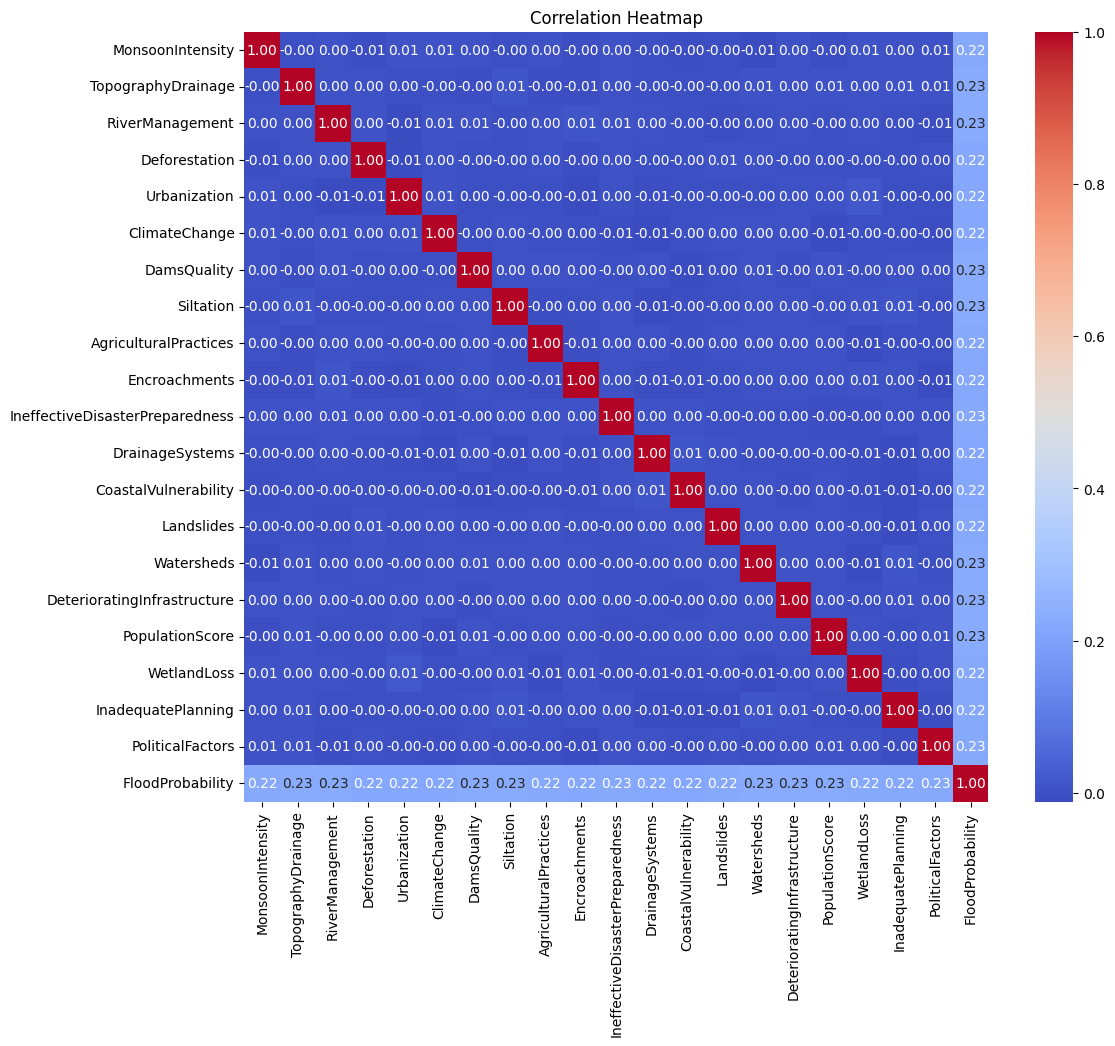

In [ ]:
# HeatMap Visualization
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Preparation

In [ ]:
# Separate feature and target columns
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

In [ ]:
# Handling outliers with winsorizing (clipping outlier to persentil 1% and 99%)
for col in X.columns:
    lower = X[col].quantile(0.01)
    upper = X[col].quantile(0.99)
    X[col] = X[col].clip(lower, upper)

# Save result
X_clean = X.copy()

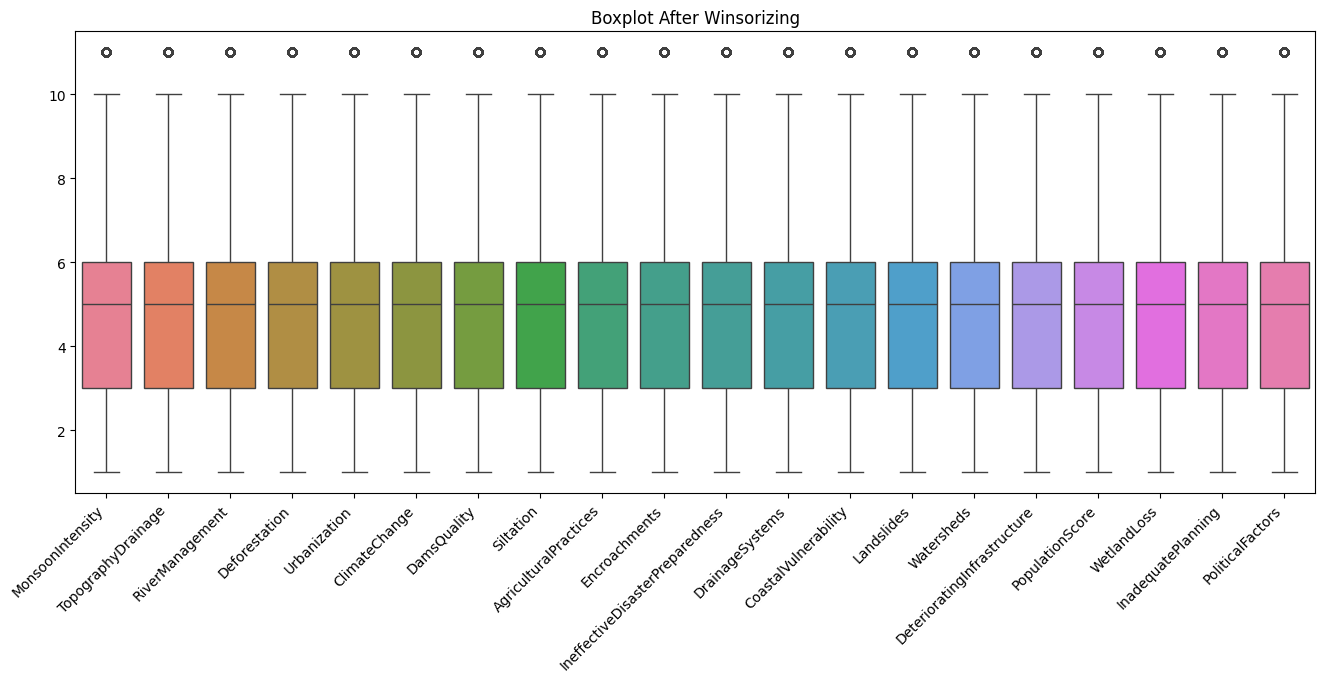

In [ ]:
# Show result after winsorizing
plt.figure(figsize=(16,6))

sns.boxplot(data=X_clean)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot After Winsorizing")
plt.show()

## No Feature Engineering

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.1, random_state=42)

# Scaling with RobustScaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 45000 non-null  float64
 1   TopographyDrainage               45000 non-null  float64
 2   RiverManagement                  45000 non-null  float64
 3   Deforestation                    45000 non-null  float64
 4   Urbanization                     45000 non-null  float64
 5   ClimateChange                    45000 non-null  float64
 6   DamsQuality                      45000 non-null  float64
 7   Siltation                        45000 non-null  float64
 8   AgriculturalPractices            45000 non-null  float64
 9   Encroachments                    45000 non-null  float64
 10  IneffectiveDisasterPreparedness  45000 non-null  float64
 11  DrainageSystems                  45000 non-null  float64
 12  CoastalVulnerabili

In [ ]:
X_train_scaled.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,-0.003541,-0.005496,0.003489,0.001170,-0.005511,-0.004030,0.004185,-0.007444,0.003526,-0.000304,-0.000341,0.002570,-0.000719,-0.005348,-0.008815,-0.005800,-0.005304,0.000333,-0.002007,-0.002593
std,0.733686,0.736117,0.729483,0.726439,0.732108,0.730331,0.734892,0.730326,0.733205,0.730631,0.728775,0.732432,0.733666,0.729328,0.729355,0.730628,0.732487,0.731634,0.730831,0.735757
min,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333
25%,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 5000 non-null   float64
 1   TopographyDrainage               5000 non-null   float64
 2   RiverManagement                  5000 non-null   float64
 3   Deforestation                    5000 non-null   float64
 4   Urbanization                     5000 non-null   float64
 5   ClimateChange                    5000 non-null   float64
 6   DamsQuality                      5000 non-null   float64
 7   Siltation                        5000 non-null   float64
 8   AgriculturalPractices            5000 non-null   float64
 9   Encroachments                    5000 non-null   float64
 10  IneffectiveDisasterPreparedness  5000 non-null   float64
 11  DrainageSystems                  5000 non-null   float64
 12  CoastalVulnerability

In [ ]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 5000 non-null   float64
 1   TopographyDrainage               5000 non-null   float64
 2   RiverManagement                  5000 non-null   float64
 3   Deforestation                    5000 non-null   float64
 4   Urbanization                     5000 non-null   float64
 5   ClimateChange                    5000 non-null   float64
 6   DamsQuality                      5000 non-null   float64
 7   Siltation                        5000 non-null   float64
 8   AgriculturalPractices            5000 non-null   float64
 9   Encroachments                    5000 non-null   float64
 10  IneffectiveDisasterPreparedness  5000 non-null   float64
 11  DrainageSystems                  5000 non-null   float64
 12  CoastalVulnerability

In [ ]:
X_test_scaled.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.000400,-0.009467,0.016667,0.010400,0.002600,-0.009267,0.009133,0.020667,-0.013467,0.018000,0.016200,-0.010800,-0.000333,-0.007000,0.002667,0.006467,-0.009600,0.008333,-0.007133,-0.011400
std,0.726097,0.729456,0.739375,0.732575,0.738732,0.714512,0.734939,0.733903,0.721796,0.758692,0.739311,0.726965,0.745117,0.734115,0.737512,0.738979,0.724869,0.726034,0.720638,0.730418
min,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333
25%,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## With Feature Engineering

In [ ]:
# Feature engineering based on pusdataru.jatengprov.go.id

# Environmental Degradation
X_clean['EnvironmentalDegradationScore'] = (X_clean[['Deforestation', 'WetlandLoss', 'Urbanization']].mean(axis=1))

# River Obstruction Risk
X_clean['RiverObstructionRisk'] = (X_clean[['Encroachments', 'Siltation']].mean(axis=1))

In [ ]:
# Selecting features
selected_features = ['MonsoonIntensity', 'CoastalVulnerability', 'EnvironmentalDegradationScore',
                     'RiverObstructionRisk', 'Siltation', 'Deforestation']

X_selected = X_clean[selected_features].copy()

In [ ]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MonsoonIntensity               50000 non-null  int64  
 1   CoastalVulnerability           50000 non-null  int64  
 2   EnvironmentalDegradationScore  50000 non-null  float64
 3   RiverObstructionRisk           50000 non-null  float64
 4   Siltation                      50000 non-null  int64  
 5   Deforestation                  50000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.3 MB


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)

# Scaling with RobustScaler
scaler = RobustScaler()
X_train_scaled_f = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled_f = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MonsoonIntensity               45000 non-null  float64
 1   CoastalVulnerability           45000 non-null  float64
 2   EnvironmentalDegradationScore  45000 non-null  float64
 3   RiverObstructionRisk           45000 non-null  float64
 4   Siltation                      45000 non-null  float64
 5   Deforestation                  45000 non-null  float64
dtypes: float64(6)
memory usage: 2.1 MB


In [ ]:
X_train_scaled_f.head()

,MonsoonIntensity,CoastalVulnerability,EnvironmentalDegradationScore,RiverObstructionRisk,Siltation,Deforestation
0,0.666667,0.333333,0.6,-1.25,-1.000000,0.000000
1,-0.666667,-0.333333,1.0,-0.75,-1.000000,1.666667
2,0.666667,-1.333333,1.2,0.25,0.333333,0.666667
3,0.333333,0.666667,-0.4,-0.75,-0.666667,-1.000000
4,-0.333333,-0.666667,-1.2,0.25,-0.333333,0.000000


In [ ]:
X_train_scaled_f.describe()

,MonsoonIntensity,CoastalVulnerability,EnvironmentalDegradationScore,RiverObstructionRisk,Siltation,Deforestation
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,-0.003541,-0.000719,-0.002404,-0.005811,-0.007444,0.001170
std,0.733686,0.733666,0.758367,0.774401,0.730326,0.726439
min,-1.333333,-1.333333,-2.400000,-2.000000,-1.333333,-1.333333
25%,-0.666667,-0.666667,-0.600000,-0.500000,-0.666667,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.333333,0.400000,0.500000,0.333333,0.333333
max,2.000000,2.000000,3.600000,3.000000,2.000000,2.000000


In [ ]:
X_test_scaled_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MonsoonIntensity               5000 non-null   float64
 1   CoastalVulnerability           5000 non-null   float64
 2   EnvironmentalDegradationScore  5000 non-null   float64
 3   RiverObstructionRisk           5000 non-null   float64
 4   Siltation                      5000 non-null   float64
 5   Deforestation                  5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
X_test_scaled_f.describe()

,MonsoonIntensity,CoastalVulnerability,EnvironmentalDegradationScore,RiverObstructionRisk,Siltation,Deforestation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.000400,-0.000333,0.012800,0.029000,0.020667,0.010400
std,0.726097,0.745117,0.763823,0.797064,0.733903,0.732575
min,-1.333333,-1.333333,-2.400000,-2.000000,-1.333333,-1.333333
25%,-0.666667,-0.666667,-0.600000,-0.500000,-0.666667,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.333333,0.600000,0.500000,0.333333,0.333333
max,2.000000,2.000000,2.800000,3.000000,2.000000,2.000000


# Modelling

**DEEP NEURAL NETWORK** <BR>
Without Feature Engineering


In [ ]:
model_b = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_b.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model_b.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0646 - mae: 0.1692 - val_loss: 0.0015 - val_mae: 0.0316
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0017 - mae: 0.0311 - val_loss: 3.2565e-04 - val_mae: 0.0140
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.8845e-04 - mae: 0.0201 - val_loss: 1.5538e-04 - val_mae: 0.0093
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.3543e-04 - mae: 0.0156 - val_loss: 7.3619e-05 - val_mae: 0.0061
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.1865e-04 - mae: 0.0133 - val_loss: 7.5218e-05 - val_mae: 0.0063
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 2.4764e-04 - mae: 0.0114 - val_loss: 4.4959e-05 - val_mae: 0.0049
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9925e-04 - mae: 0.0102 - val_loss: 3.4475e-05 - val_mae: 0.0043
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7665e-04 - mae: 0.0094 - val_loss: 3.7223e-0

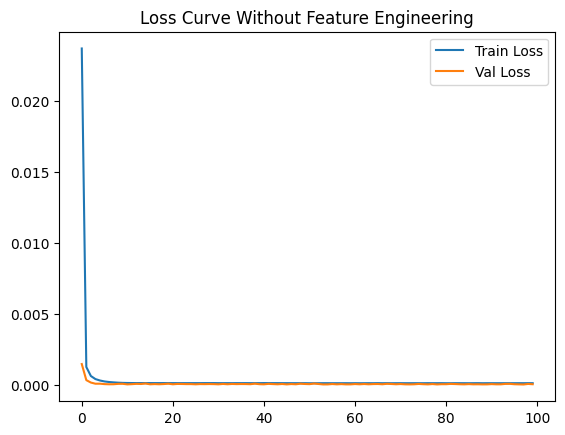

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8844e-05 - mae: 0.0044
Test MAE: 0.0043


In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve Without Feature Engineering")
plt.legend()
plt.show()

loss, mae = model_b.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/

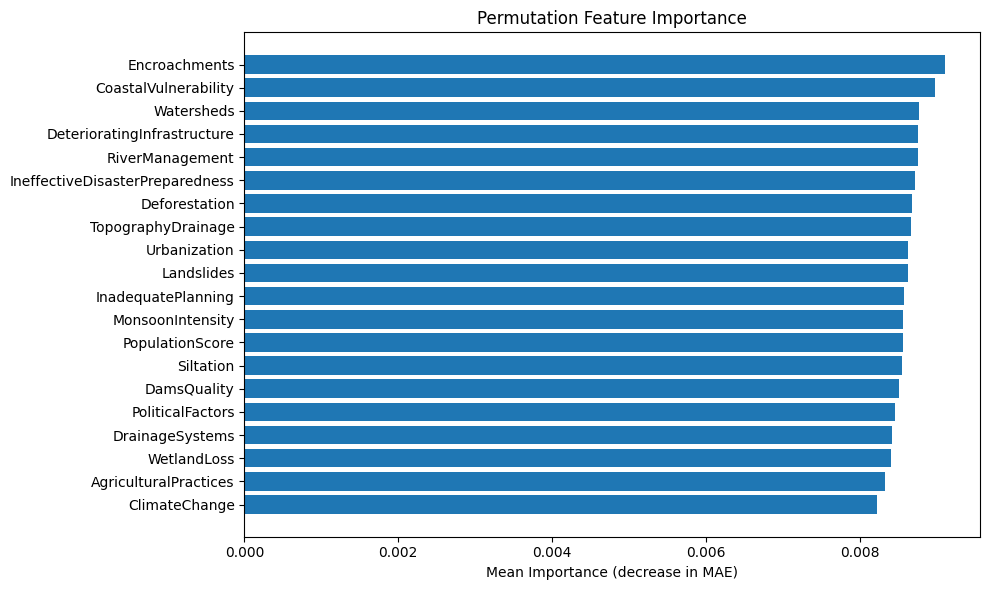

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_b, X_test_scaled, y_test, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42
)

importances = result.importances_mean
feature_names = X_test_scaled.columns

sorted_idx = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Mean Importance (decrease in MAE)")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = model_b.predict(X_test_scaled)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
model_b.save("flood_model_b.h5")

In [ ]:
import joblib

joblib.dump(scaler, "flood_scaler.pkl")

['flood_scaler.pkl']

In [ ]:
model_b = load_model('flood_model_b.h5')
scaler = joblib.load('flood_scaler.pkl')

**DEEP NEURAL NETWORK** <BR>
With Feature Engineering

In [ ]:
X_train_scaled_f.describe()

,MonsoonIntensity,CoastalVulnerability,EnvironmentalDegradationScore,RiverObstructionRisk,Siltation,Deforestation
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,-0.003541,-0.000719,-0.002404,-0.005811,-0.007444,0.001170
std,0.733686,0.733666,0.758367,0.774401,0.730326,0.726439
min,-1.333333,-1.333333,-2.400000,-2.000000,-1.333333,-1.333333
25%,-0.666667,-0.666667,-0.600000,-0.500000,-0.666667,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.333333,0.400000,0.500000,0.333333,0.333333
max,2.000000,2.000000,3.600000,3.000000,2.000000,2.000000


In [ ]:
model_f = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_f.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_f.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model_f.fit(X_train_scaled_f, y_train,
                    validation_data=(X_test_scaled_f, y_test),
                    epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0398 - mae: 0.1368 - val_loss: 0.0024 - val_mae: 0.0391
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0029 - mae: 0.0422 - val_loss: 0.0016 - val_mae: 0.0323
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0016 - val_mae: 0.0321
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0016 - val_mae: 0.0321
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0017 - mae: 0.0332 - val_loss: 0.0016 - val_mae: 0.0324
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0016 - val_mae: 0.0320
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0016 - val_mae: 0.0320
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0016 - val_mae: 0.0321
Epoch 9/100
1407/1407 ━━━━━━━━━━

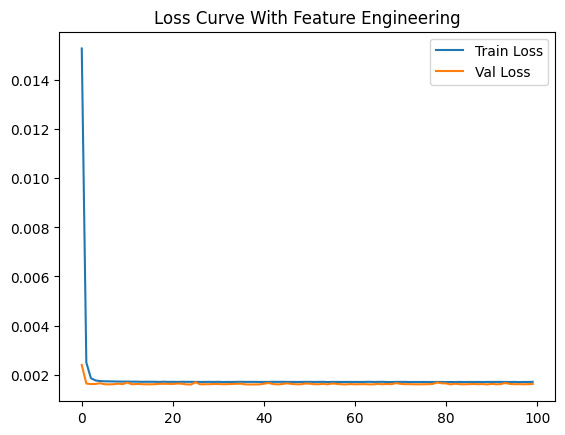

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mae: 0.0322
Test MAE: 0.0321


In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve With Feature Engineering")
plt.legend()
plt.show()

loss, mae = model_f.evaluate(X_test_scaled_f, y_test)
print(f"Test MAE: {mae:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━

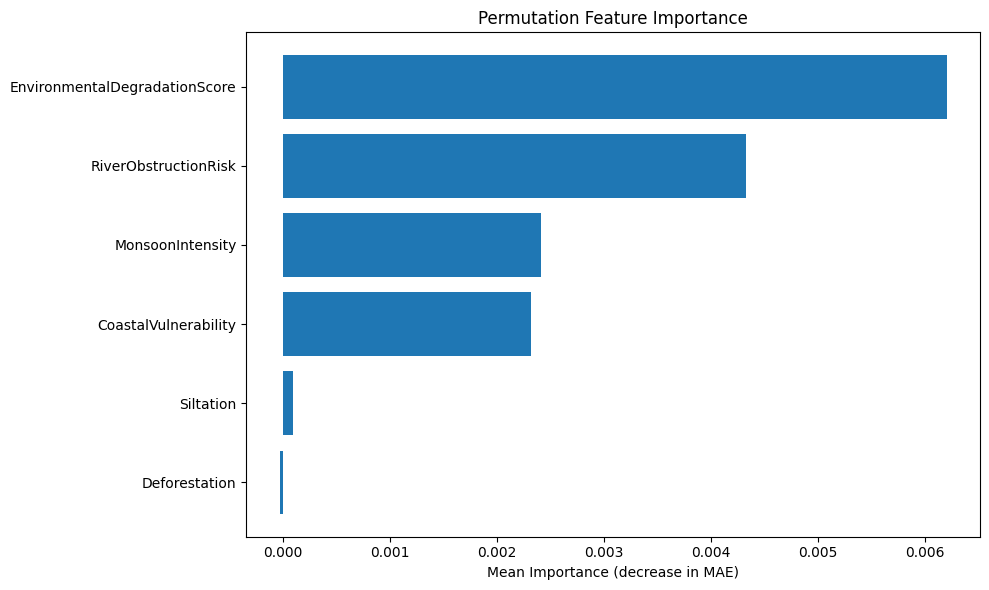

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_f, X_test_scaled_f, y_test, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42
)

importances = result.importances_mean
feature_names = X_test_scaled_f.columns

sorted_idx = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Mean Importance (decrease in MAE)")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

**ARTIFICIAL NEURAL NETWORK** <br>
Without Feature Engineering

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    # Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0257 - mae: 0.1097 - val_loss: 0.0018 - val_mae: 0.0337
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 6.7551e-04 - val_mae: 0.0205
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.2028e-04 - mae: 0.0180 - val_loss: 2.3791e-04 - val_mae: 0.0121
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7922e-04 - mae: 0.0105 - val_loss: 7.0408e-05 - val_mae: 0.0066
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.4484e-05 - mae: 0.0057 - val_loss: 3.1299e-05 - val_mae: 0.0043
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.4147e-05 - mae: 0.0036 - val_loss: 1.9249e-05 - val_mae: 0.0031
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9218e-05 - mae: 0.0031 - val_loss: 3.0919e-05 - val_mae: 0.0043
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.0435e-05 - mae: 0.0032 - val_loss: 1.7664e-0

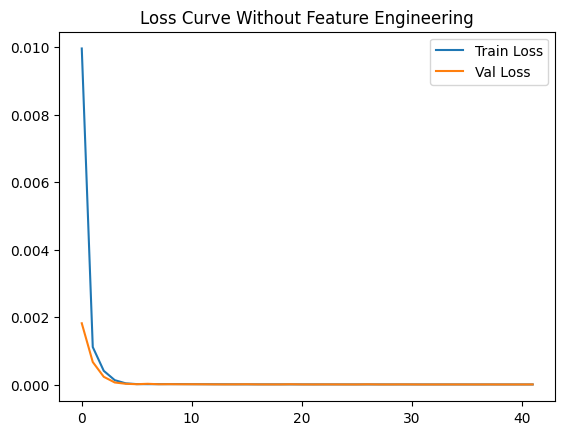

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2012e-05 - mae: 0.0021
Test MAE: 0.0020


In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve Without Feature Engineering")
plt.legend()
plt.show()

loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━

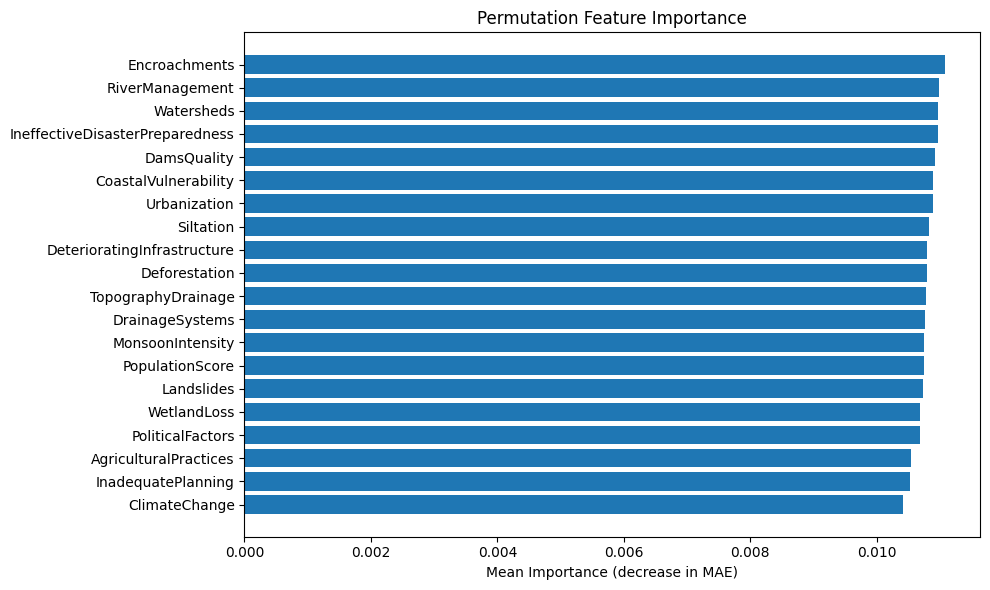

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, X_test_scaled, y_test, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42
)

importances = result.importances_mean
feature_names = X_test_scaled.columns

sorted_idx = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Mean Importance (decrease in MAE)")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

**ARTIFICIAL NEURAL NETWORK** <br>
With Feature Engineering

In [ ]:
model_a = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_f.shape[1],)),
    # Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


model_a.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model_a.fit(X_train_scaled_f, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0188 - mae: 0.0890 - val_loss: 0.0022 - val_mae: 0.0377
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0020 - val_mae: 0.0359
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.0018 - val_mae: 0.0341
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0019 - val_mae: 0.0343
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0018 - val_mae: 0.0334
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0019 - val_mae: 0.0345
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0018 - val_mae: 0.0334
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0018 - val_mae: 0.0333
Epoch 9/100
1125/1125 ━━━━━━━━━━

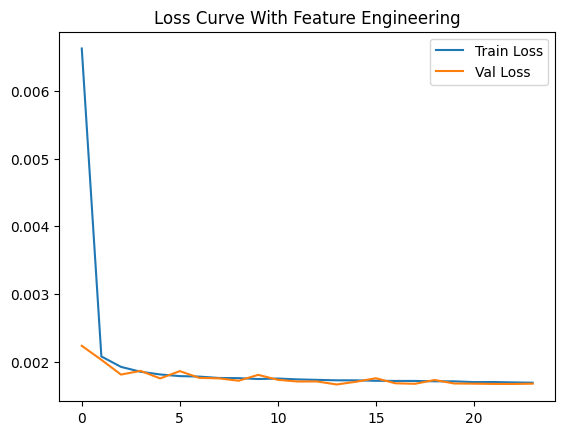

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1851 - mae: 0.4253
Test MAE: 0.4240


In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve With Feature Engineering")
plt.legend()
plt.show()

loss, mae = model_a.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━

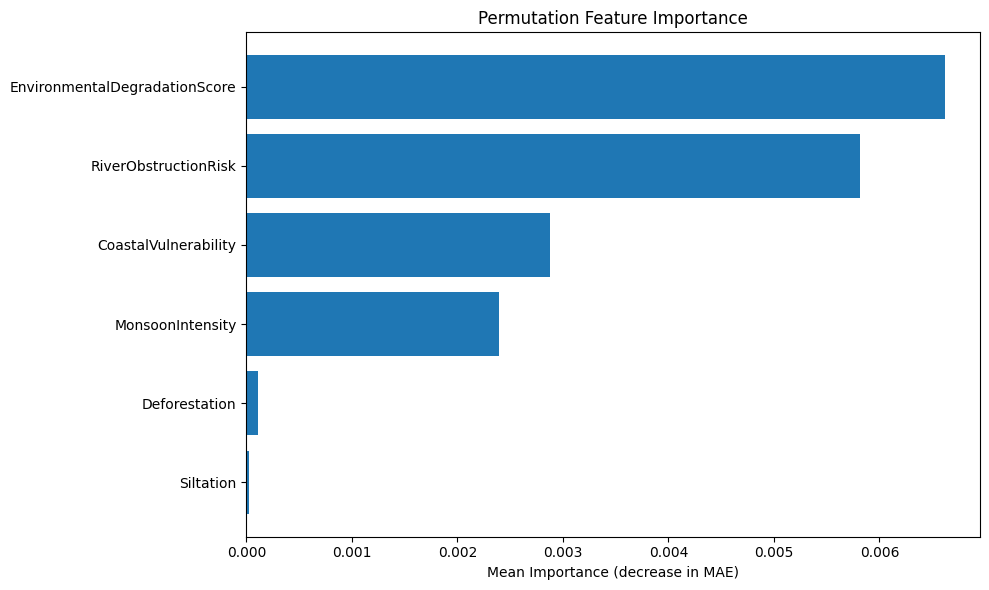

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_a, X_test_scaled_f, y_test, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42
)

importances = result.importances_mean
feature_names = X_test_scaled_f.columns

sorted_idx = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Mean Importance (decrease in MAE)")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

# Evaluasi

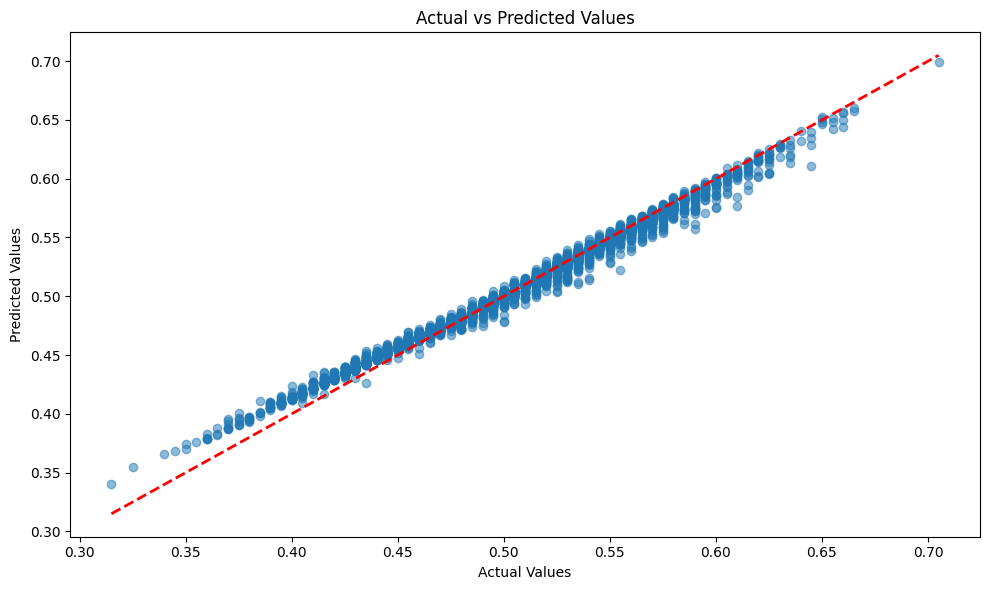

In [ ]:
# Visualisasi prediksi vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()